# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:

print ("shape: ",df.shape)
df.info()

shape:  (699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
#As we can notice Bare Nuclei data type is object

df['Bare Nuclei'].unique()  # we can observe some non numerical entries 



array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
print ('percentage of ? in bare nuclei column', df[df['Bare Nuclei'] == '?']["Bare Nuclei"].count()/df.shape[0])
print ('percentage of 1 in bare nuclei column', df[df['Bare Nuclei'] == '1']["Bare Nuclei"].count()/df.shape[0])
print ('percentage of 10 in bare nuclei column', df[df['Bare Nuclei'] == '10']["Bare Nuclei"].count()/df.shape[0])

percentage of ? in bare nuclei column 0.022889842632331903
percentage of 1 in bare nuclei column 0.575107296137339
percentage of 10 in bare nuclei column 0.1888412017167382


In [10]:
m = df['Bare Nuclei'].mode()[0]
m

'1'

In [11]:
# Rplacing ? with 1
df['Bare Nuclei'].replace('?', m ,inplace =True) 


In [12]:
# Here we would like to impute it with suitable values
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

#### As in this case we observe frequency of every unique value appering in the Bare Nuclei , "1" is has 57 % share in bare nuclei.
> - so replacing "?" with 1

In [13]:
# Check for missing value in any other column
print ('Missing values ',df.isnull().sum().sum())

Missing values  0


In [14]:
# converting bare nuclei col into int
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [16]:
dup_df = df[df.duplicated()]
dup_df.shape


(9, 11)

In [17]:
df_dup_drop = df.drop_duplicates(keep='first')
df_dup_drop.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


# df1 does not contain ID column 

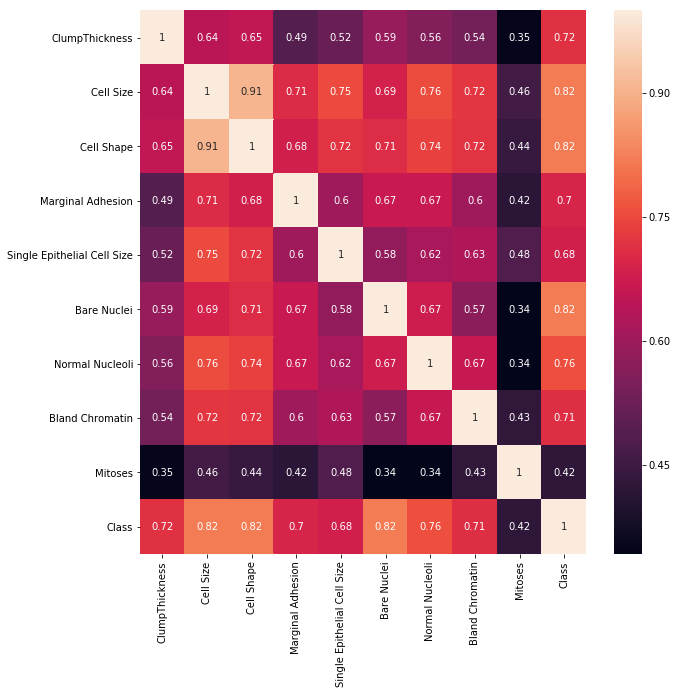

In [31]:
# Check for correlation of variable
df1 = df.drop(columns='ID',axis=1)
cor = df1.corr() # df1 does not contain ID column 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True)

>- Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
>- and bland chromatin
>- Target variable shows high correlation with most of these variables

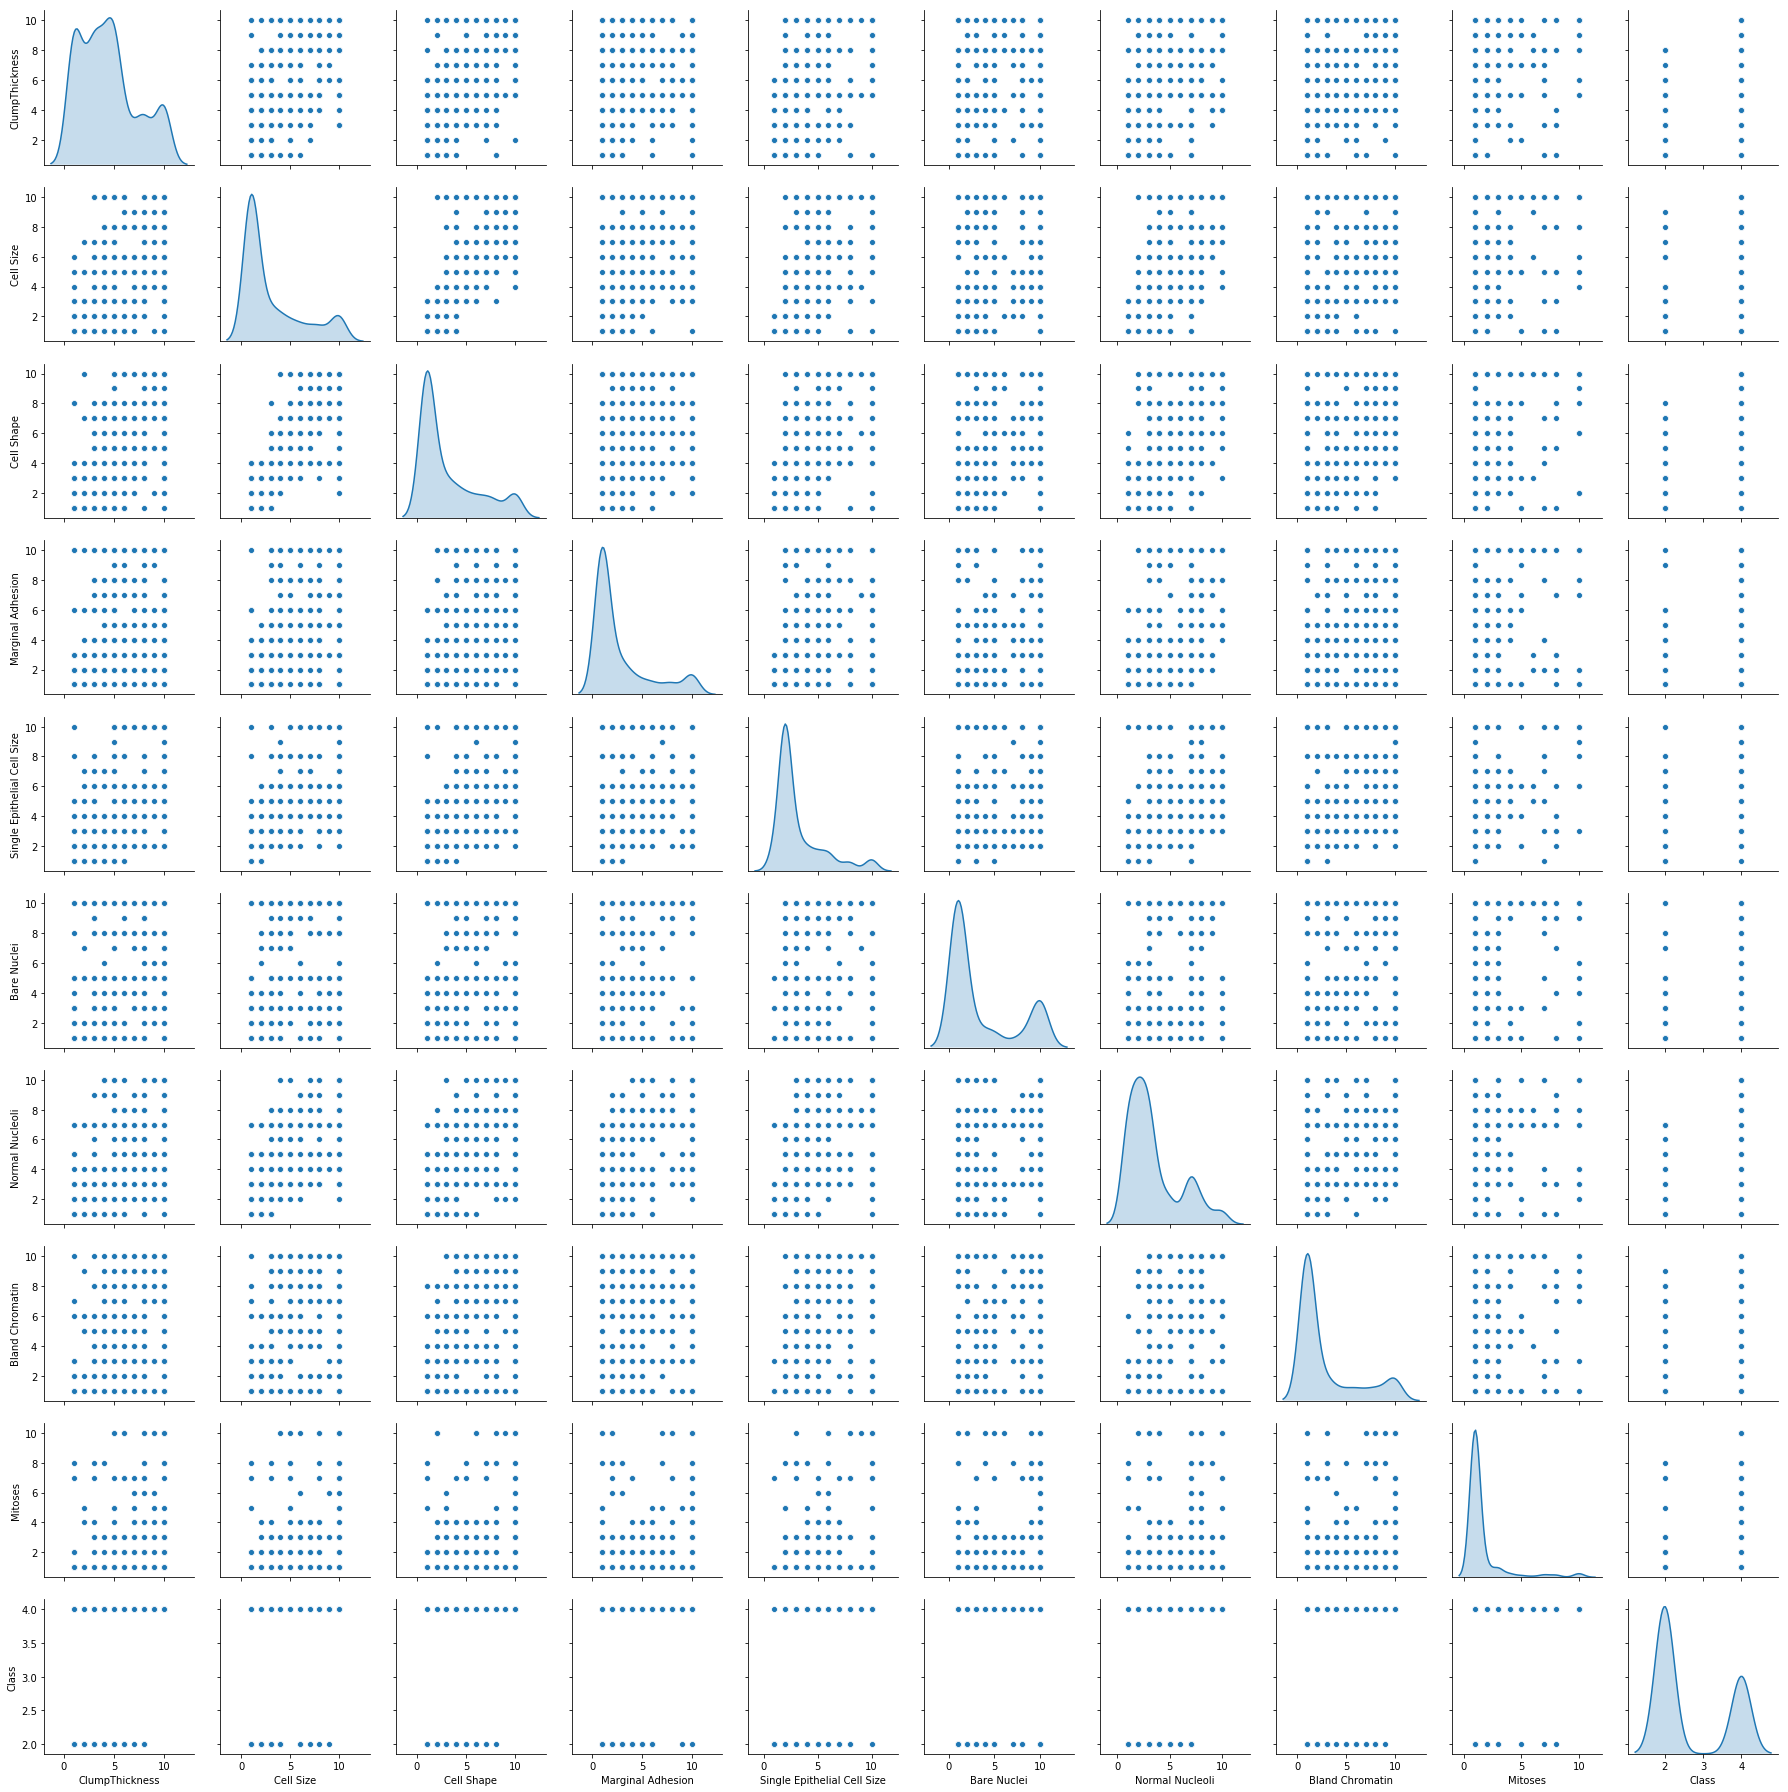

In [32]:
#Let us check for pair plots
sns.pairplot(df1,diag_kind= ('kde'));

>-  Relationship between variables shows come correlation. 
>- Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
>-  Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [33]:
# We could see most of the outliers are now removed.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [35]:
#df1.boxplot(by = 'Class',  layout=(5,5), figsize=(15, 25)); 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


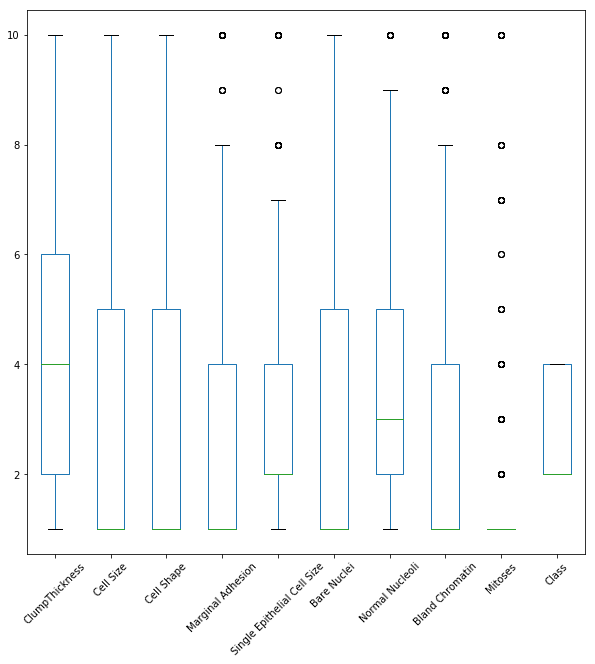

In [36]:
boxplot = df1.boxplot( grid=False, rot=45, fontsize=10,figsize=(10, 10));

In [43]:
# outlier analysis

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 
for features in df1.columns:
    print  ("  Outliers in {}''coloumn are on indices  =   ".format(features) ,str(outliers_iqr ( df1[features])))

  Outliers in ClumpThickness''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Cell Size''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Cell Shape''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Marginal Adhesion''coloumn are on indices  =    (array([ 14,  20,  38,  40,  73,  99, 104, 107, 112, 117, 132, 167, 173,
       187, 188, 191, 205, 210, 213, 214, 251, 260, 263, 264, 282, 284,
       285, 286, 304, 312, 323, 348, 353, 360, 361, 366, 367, 425, 440,
       479, 482, 487, 488, 493, 494, 506, 514, 523, 546, 565, 569, 586,
       588, 608, 610, 611, 612, 648, 680, 681], dtype=int64),)
  Outliers in Single Epithelial Cell Size''coloumn are on indices  =    (array([ 32,  42,  43,  44,  53,  54,  62,  67,  71,  84,  85,  98, 100,
       104, 107, 113, 122, 123, 124, 129, 132, 148, 149, 166, 173, 175,
       177, 191, 201, 221, 229, 236, 253, 254, 261, 264, 285, 286, 302,
       312, 344, 357, 358, 360, 366, 412, 416, 421,

In [41]:
pd.crosstab(df1['Mitoses'],df['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [48]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    if np.where(ys > upper_bound):
        ys = upper_bound
    if np.where(ys < lower_bound):
        ys = lower_bound
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 
    
for features in df1.columns:
    print  ("  Outliers in {}''coloumn are on indices  =   ".format(features) ,str(outliers_iqr ( df1[features])))

  Outliers in ClumpThickness''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Cell Size''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Cell Shape''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Marginal Adhesion''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Single Epithelial Cell Size''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Bare Nuclei''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Normal Nucleoli''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Bland Chromatin''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Mitoses''coloumn are on indices  =    (array([], dtype=int64),)
  Outliers in Class''coloumn are on indices  =    (array([], dtype=int64),)


In [189]:

for i in df1.columns:
    up_whisk= df1[i].quantile(0.75)+1.5*(df1[i].quantile(0.75) - df1[i].quantile(0.25))
    for j in df1[i]:
        if(j > up_whisk):
            df1[i]=df1[i].replace(j,up_whisk)

>- As no columns now contains outliesrs thats why we are getting empty array 

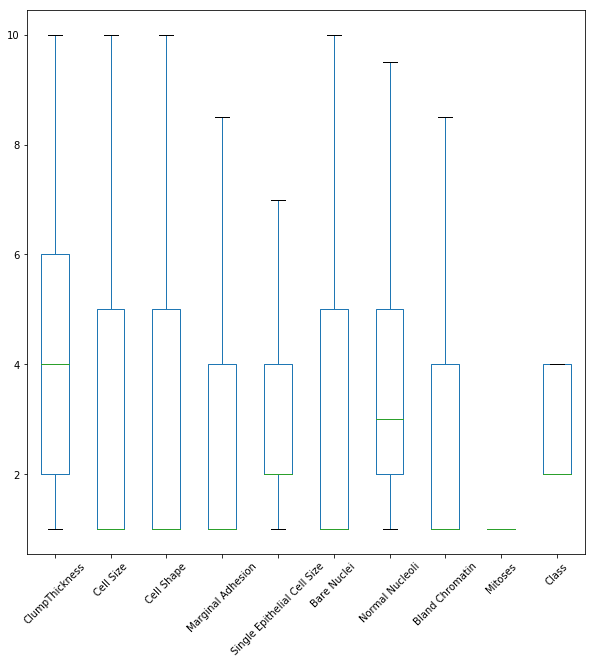

In [190]:
boxplot = df1.boxplot( grid=False, rot=45, fontsize=10,figsize=(10, 10));

# Q6 Create a covariance matrix for identifying Principal components

In [191]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
 
from scipy.stats import zscore

# Step 1 - Create covariance matrix


In [192]:
X = df1.drop(columns='Class',axis=1)

X_std = StandardScaler().fit_transform(X)

In [193]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.50022749 0.55064449 0.5908535
  0.56225094 0.54666716 0.        ]
 [0.64583645 1.00143266 0.90818117 0.72048077 0.78565647 0.68765657
  0.75711145 0.72733735 0.        ]
 [0.65552689 0.90818117 1.00143266 0.69580609 0.75601336 0.70848734
  0.73744448 0.72318567 0.        ]
 [0.50022749 0.72048077 0.69580609 1.00143266 0.65744977 0.68022757
  0.68186453 0.62651495 0.        ]
 [0.55064449 0.78565647 0.75601336 0.65744977 1.00143266 0.62943312
  0.65715182 0.68576765 0.        ]
 [0.5908535  0.68765657 0.70848734 0.68022757 0.62943312 1.00143266
  0.6794109  0.5924866  0.        ]
 [0.56225094 0.75711145 0.73744448 0.68186453 0.65715182 0.6794109
  1.00143266 0.67343479 0.        ]
 [0.54666716 0.72733735 0.72318567 0.62651495 0.68576765 0.5924866
  0.67343479 1.00143266 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [212]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [213]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 3.08814898e-01  8.83763240e-01 -7.54136954e-05 -3.28031977e-03
   1.86250312e-01 -2.41903227e-01  1.69671035e-01 -3.98812990e-02
   0.00000000e+00]
 [ 3.87131918e-01 -2.85656412e-02 -7.37278498e-01 -1.95490183e-01
  -3.57058062e-01 -1.15336092e-01 -2.81069182e-01  2.18458528e-01
   0.00000000e+00]
 [ 3.84066759e-01  3.40173521e-02  6.61123996e-01 -1.63403829e-01
  -5.24362796e-01 -1.11953931e-02 -2.73988710e-01  1.93386408e-01
   0.00000000e+00]
 [ 3.43812543e-01 -3.63162623e-01  5.34558980e-02  4.21924797e-01
   1.01818589e-03 -6.19323481e-01  4.16053079e-01  1.11198030e-01
   0.00000000e+00]
 [ 3.54600719e-01 -1.80647945e-01  8.06236071e-02 -3.40539270e-01
   6.03683728e-01  2.35130516e-01  8.84760065e-02  5.40008410e-01
   0.00000000e+00]
 [ 3.43371537e-01  6.52716732e-02 -7.97036962e-02  6.34661688e-01
  -1.11541542e-01  6.63919757e-01  1.21963142e-01  2.41141323e-02
   0.00000000e+00]
 [ 3.55845857e-01 -1.45015364e-01  5.56912760e-02  1.58367758e-01
   4.14192

# Q8 Find variance and cumulative variance by each eigen vector

In [214]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
var_exp

Cumulative Variance Explained [ 71.52823355  78.23211783  83.93781821  88.22334574  92.07521218
  95.78271008  98.89288459 100.         100.        ]


[71.52823355401121,
 6.703884278143031,
 5.705700373197606,
 4.2855275355114175,
 3.851866440892312,
 3.7074979025166184,
 3.1101745047930076,
 1.1071154109348038,
 0.0]

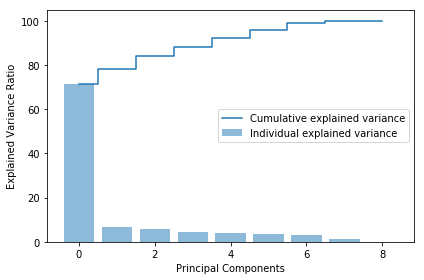

In [215]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

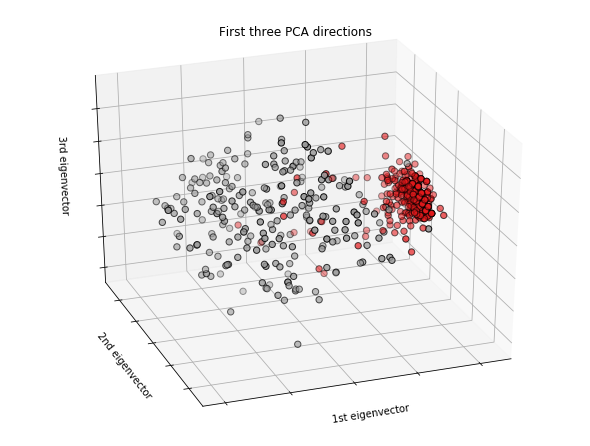

In [216]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_std)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df['Class'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [217]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.44391541e+00,  1.84062110e+00, -1.56855005e+00, ...,
         4.00619048e+00,  2.46259736e+00,  2.89819853e+00],
       [-6.07761835e-01,  3.59915174e-01,  2.38408382e-03, ...,
         8.84009432e-01,  8.81750995e-01,  9.63841685e-01],
       [-8.13229701e-03, -7.59461049e-01, -1.85816974e-01, ...,
         2.27916098e+00,  3.01142378e-01, -7.45105069e-02],
       [-2.48474666e-01,  1.69877183e+00, -2.13464404e-01, ...,
        -7.93284292e-02, -1.40519923e+00, -4.84488779e-01],
       [ 1.69369780e-01, -6.56350103e-01,  2.56274527e-01, ...,
         1.15805828e+00,  1.49948862e+00,  1.79178658e+00]])

In [218]:
pca.components_

array([[ 0.3088149 ,  0.38713192,  0.38406676,  0.34381254,  0.35460072,
         0.34337154,  0.35584586,  0.34463886, -0.        ],
       [-0.88376324,  0.02856564, -0.03401735,  0.36316262,  0.18064794,
        -0.06527167,  0.14501536,  0.16485976,  0.        ],
       [ 0.00328032,  0.19549018,  0.16340383, -0.4219248 ,  0.34053927,
        -0.63466169, -0.15836776,  0.46174526,  0.        ],
       [-0.0398813 ,  0.21845853,  0.19338641,  0.11119803,  0.54000841,
         0.02411413, -0.50279734, -0.5965956 ,  0.        ],
       [-0.16967103,  0.28106918,  0.27398871, -0.41605308, -0.08847601,
        -0.12196314,  0.62224112, -0.48389551, -0.        ]])

# Q10 Find correlation between components and features

Text(0.5, 1.0, 'Correlation between different features')

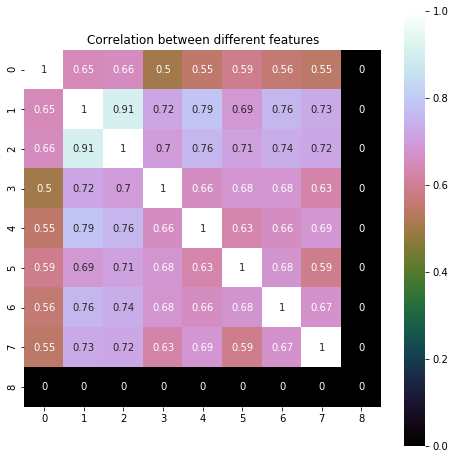

In [220]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_matrix, vmax=1, square=True,annot=True,cmap='cubehelix');

plt.title('Correlation between different features')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [171]:
jokes = pd.read_csv('jokes.csv')
jokes.head()


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [172]:
jokes.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [173]:
ratings = jokes.iloc[0:200,:]
ratings.head()


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [176]:
ratings = ratings.drop(columns='NumJokes',axis=1)

In [177]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [178]:
col = np.arange(0,100)


In [200]:
ratings.columns = col
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [186]:
ratings = ratings.replace('99',0)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)
ratings_diff.shape

(200, 100)

In [181]:
ratings_diff.shape

(200, 100)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [182]:
ratings_diff = pd.DataFrame(ratings_diff)

In [202]:
rank = ratings_diff.mean()

In [203]:
rank 

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
          ...     
95    2.858824e-17
96   -2.137179e-17
97    1.198694e-16
98    1.840889e-16
99    7.549517e-17
Length: 100, dtype: float64

In [204]:
rank = pd.DataFrame(rank.sort_values(ascending= False))

In [205]:
rank.head(10)

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
